# Local Interpretable Model-agnostic Explanations (LIME)

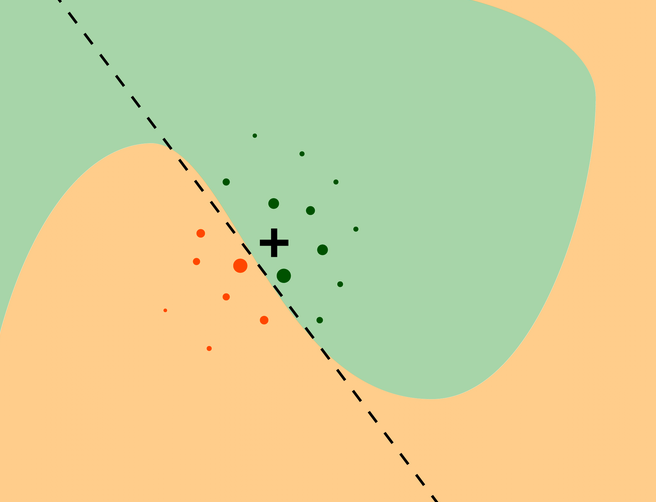

http://ema.drwhy.ai/LIME.html

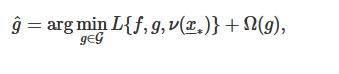

## Plusy

 * jest niezależna od modelu, ponieważ nie pociąga za sobą żadnych założeń dotyczących struktury modelu czarnej skrzynki
 * zapewnia lokalną wierność, tj. wyjaśnienia są lokalnie dobrze dopasowane do modelu czarnej skrzynki

## Minusy

* istnieją różne propozycje znalezienia interpretowalnych reprezentacji dla ciągłych i kategorycznych zmiennych objaśniających w przypadku danych tabelarycznych. Problem ten nie został jeszcze rozwiązany. Prowadzi to do różnych implementacji LIME, które używają różnych metod transformacji zmiennych, co w konsekwencji może prowadzić do różnych wyników
* w przypadku danych wielowymiarowych, punkty danych są rzadkie. Zdefiniowanie "lokalnego sąsiedztwa" dla interesującej nas instancji może nie być proste

In [33]:
data(titanic_imputed, package = "DALEX")

model <- ranger::ranger(survived~., data = titanic_imputed, classification = TRUE, probability = TRUE)

In [10]:
library(mlr)
titanic_imputed_fct <- titanic_imputed
titanic_imputed_fct$survived <- as.factor(titanic_imputed_fct$survived)

classif_task <- makeClassifTask(data = titanic_imputed_fct, target = "survived")
classif_lrn <- makeLearner("classif.svm", predict.type = "prob")
model_mlr <- train(classif_lrn, classif_task)

In [18]:
library(DALEX)
library(DALEXtra)
explainer <- DALEX::explain(model = model,
                     data = titanic_imputed[,-8],
                     y = titanic_imputed$survived)

Preparation of a new explainer is initiated
  -> model label       :  ranger  (  default  )
  -> data              :  2207  rows  7  cols 
  -> target variable   :  2207  values 
  -> predict function  :  yhat.ranger  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package ranger , ver. 0.12.1 , task classification (  default  ) 
  -> predicted values  :  numerical, min =  0.01263138 , mean =  0.3215749 , max =  0.9919616  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.7804315 , mean =  0.0005818846 , max =  0.8806912  
  A new explainer has been created!  


In [19]:
explainer_mlr <- explain_mlr(model = model_mlr,
                         data = titanic_imputed_fct[,-8],
                         y = as.numeric(as.character(titanic_imputed_fct$survived)))

Preparation of a new explainer is initiated
  -> model label       :  WrappedModel  (  default  )
  -> data              :  2207  rows  7  cols 
  -> target variable   :  2207  values 
  -> predict function  :  yhat.WrappedModel  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package mlr , ver. 2.19.0 , task classification (  default  ) 
  -> predicted values  :  numerical, min =  0.08618367 , mean =  0.3238001 , max =  0.9598298  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.863975 , mean =  -0.001643307 , max =  0.9069462  
  A new explainer has been created!  


In [20]:
library("lime")
model_type.dalex_explainer <- DALEXtra::model_type.dalex_explainer
predict_model.dalex_explainer <- DALEXtra::predict_model.dalex_explainer

In [25]:
lime_johnny_mlr <- predict_surrogate(explainer = explainer_mlr, 
                                 new_observation = titanic_imputed_fct[11, -8], 
                                 n_features = 3, 
                                 n_permutations = 1000,
                                 type = "lime")

Warning message:
"sibsp does not contain enough variance to use quantile binning. Using standard binning instead."Warning message:
"parch does not contain enough variance to use quantile binning. Using standard binning instead."

In [26]:
lime_johnny_ranger <- predict_surrogate(explainer = explainer, 
                                     new_observation = titanic_imputed_fct[11, -8], 
                                     n_features = 3, 
                                     n_permutations = 1000,
                                     type = "lime")

Warning message:
"sibsp does not contain enough variance to use quantile binning. Using standard binning instead."Warning message:
"parch does not contain enough variance to use quantile binning. Using standard binning instead."

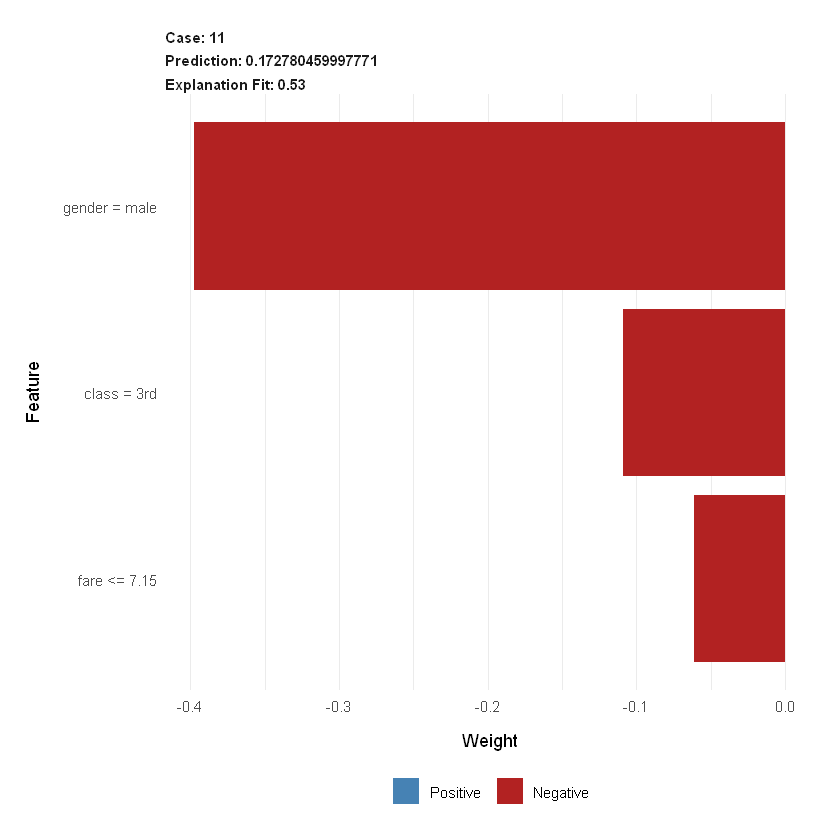

In [27]:
plot(lime_johnny_mlr)

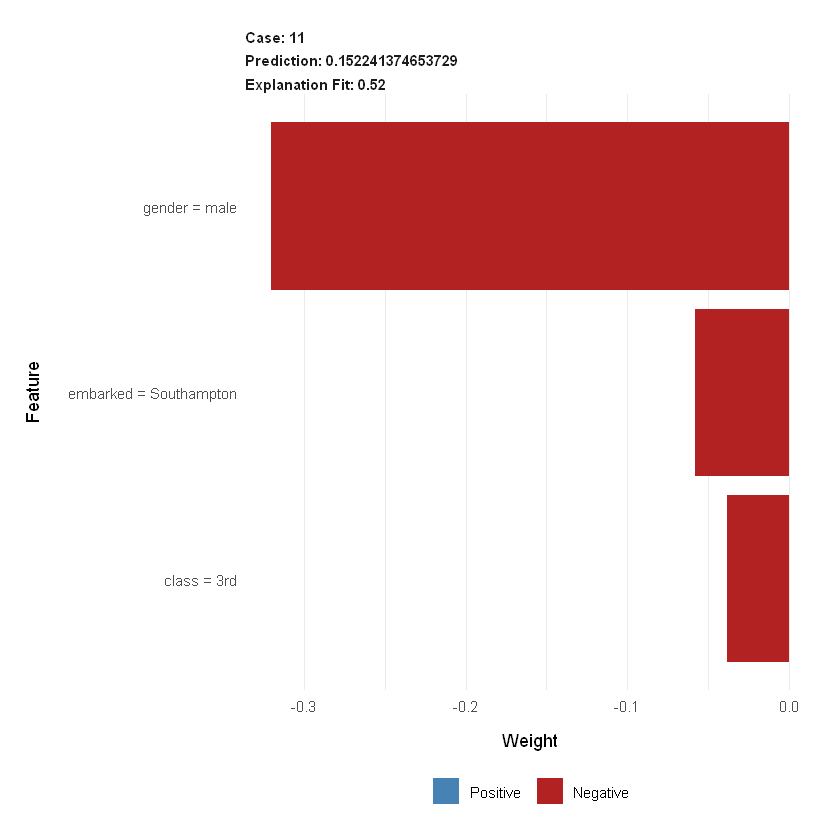

In [28]:
plot(lime_johnny_ranger)

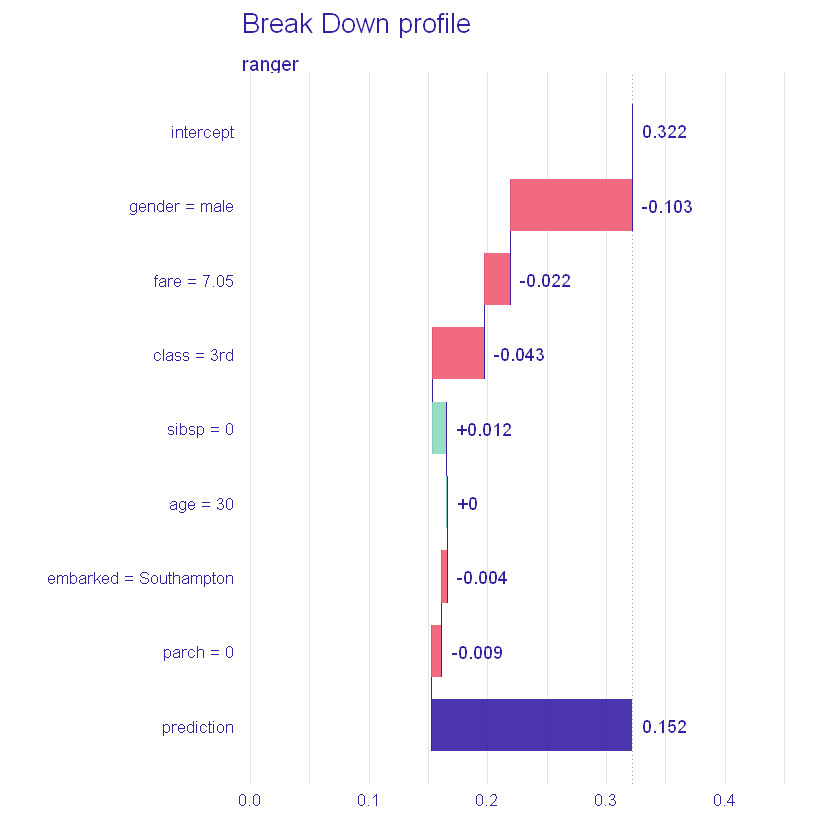

In [31]:
pp_ranger_bd_1 <- predict_parts(explainer, new_observation = titanic_imputed[11,])
plot(pp_ranger_bd_1)

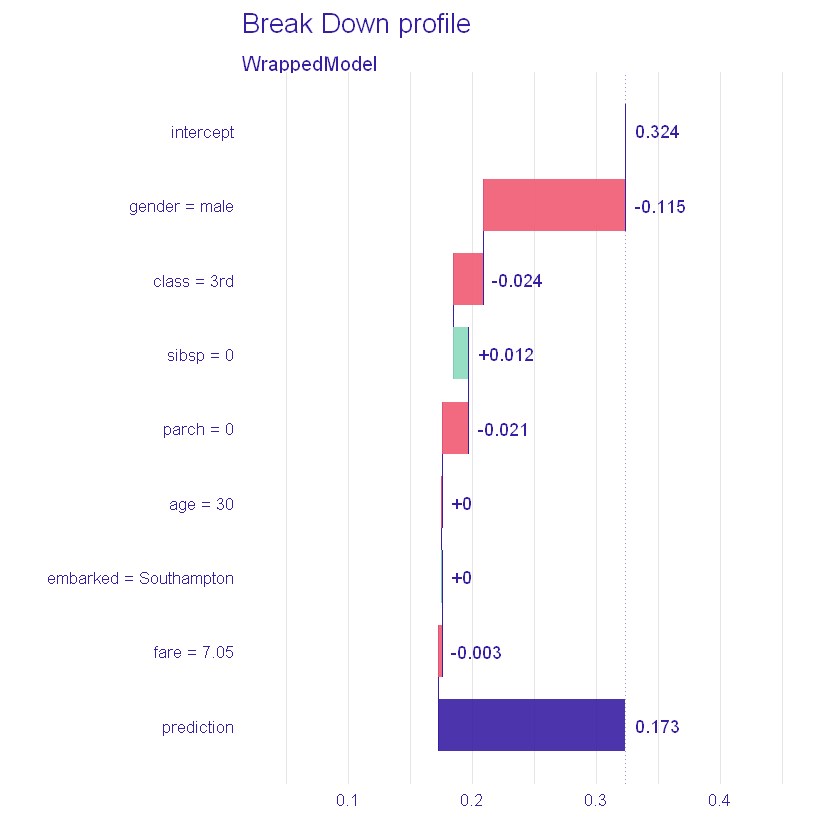

In [32]:
pp_ranger_bd_2 <- predict_parts(explainer_mlr, new_observation = titanic_imputed[11,])
plot(pp_ranger_bd_2)